# ML iris dataset
Taken from https://www.youtube.com/watch?v=tNa99PG8hR8

ML using the famous iris dataset

In [147]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree

class_names = iris.target_names

iris = load_iris()
print(iris.feature_names)
print(class_names)
print(iris.data[0])
print(iris.target[0])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[ 5.1  3.5  1.4  0.2]
0


In [148]:
# Show all data
for i in range(len(iris.target)):
    print("Row {}\t: Features {} : Label {}".format(i, iris.data[i], iris.target[i]))

Row 0	: Features [ 5.1  3.5  1.4  0.2] : Label 0
Row 1	: Features [ 4.9  3.   1.4  0.2] : Label 0
Row 2	: Features [ 4.7  3.2  1.3  0.2] : Label 0
Row 3	: Features [ 4.6  3.1  1.5  0.2] : Label 0
Row 4	: Features [ 5.   3.6  1.4  0.2] : Label 0
Row 5	: Features [ 5.4  3.9  1.7  0.4] : Label 0
Row 6	: Features [ 4.6  3.4  1.4  0.3] : Label 0
Row 7	: Features [ 5.   3.4  1.5  0.2] : Label 0
Row 8	: Features [ 4.4  2.9  1.4  0.2] : Label 0
Row 9	: Features [ 4.9  3.1  1.5  0.1] : Label 0
Row 10	: Features [ 5.4  3.7  1.5  0.2] : Label 0
Row 11	: Features [ 4.8  3.4  1.6  0.2] : Label 0
Row 12	: Features [ 4.8  3.   1.4  0.1] : Label 0
Row 13	: Features [ 4.3  3.   1.1  0.1] : Label 0
Row 14	: Features [ 5.8  4.   1.2  0.2] : Label 0
Row 15	: Features [ 5.7  4.4  1.5  0.4] : Label 0
Row 16	: Features [ 5.4  3.9  1.3  0.4] : Label 0
Row 17	: Features [ 5.1  3.5  1.4  0.3] : Label 0
Row 18	: Features [ 5.7  3.8  1.7  0.3] : Label 0
Row 19	: Features [ 5.1  3.8  1.5  0.3] : Label 0
Row 20	: F

In [149]:
X = iris.data
y = iris.target

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1234)

In [150]:
# train the classifier
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [151]:
# now let's predict
y_predictions = clf.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predictions)

0.94166666666666665

In [152]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_predictions)

Confusion matrix, without normalization
[[39  0  0]
 [ 0 39  4]
 [ 0  3 35]]
Normalized confusion matrix
[[ 1.        0.        0.      ]
 [ 0.        0.906977  0.093023]
 [ 0.        0.078947  0.921053]]


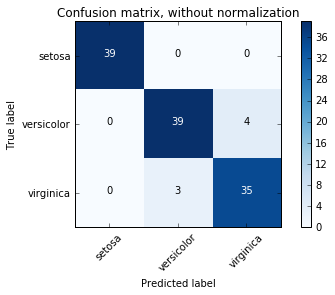

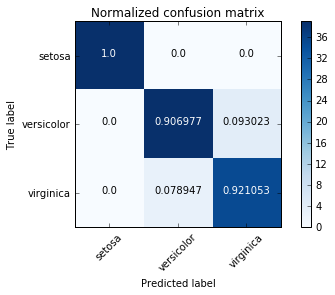

In [153]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=6)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [154]:
# try to visualize the tree
tree.export_graphviz(clf, 
                     out_file='tree.dot', 
                     impurity=False,
                     filled=True, 
                     rounded=True,
                     feature_names=iris.feature_names,
                     class_names=iris.target_names)
# on the terminal run (graphviz needs to be installed)
# dot -Tpng tree.dot -o tree.png